In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_csv('../../data/fraudTrain.csv')
df.drop(columns=['Unnamed: 0'] , inplace=True)
df.head()     

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [3]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 22 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   trans_date_trans_time  1296675 non-null  object 
 1   cc_num                 1296675 non-null  int64  
 2   merchant               1296675 non-null  object 
 3   category               1296675 non-null  object 
 4   amt                    1296675 non-null  float64
 5   first                  1296675 non-null  object 
 6   last                   1296675 non-null  object 
 7   gender                 1296675 non-null  object 
 8   street                 1296675 non-null  object 
 9   city                   1296675 non-null  object 
 10  state                  1296675 non-null  object 
 11  zip                    1296675 non-null  int64  
 12  lat                    1296675 non-null  float64
 13  long                   1296675 non-null  float64
 14  city_pop          

In [4]:
df.drop(columns=['trans_num' ,'unix_time' ,'first' ,'last' ] , inplace=True)  
df['trans_date_trans_time'] = pd.to_datetime(df['trans_date_trans_time'])
df['dob'] = pd.to_datetime(df['dob']) 
df['age'] = (df['trans_date_trans_time'] - df['dob']).apply(lambda x: x.days // 365) 
df.drop(columns=['dob'] , inplace=True)
df['cc_num'] = df['cc_num'].astype('str') 
df['zip'] = df['zip'].astype('str') 



In [5]:
numerical_features=[feature for feature in df.columns if df[feature].dtypes!='O' and feature not in ['trans_date_trans_time'] and len(df[feature].unique())>25 ]
df_con_num=df[numerical_features]
df_con_num 

,amt,lat,long,city_pop,merch_lat,merch_long,age
0,4.97,36.0788,-81.1781,3495,36.011293,-82.048315,30
1,107.23,48.8878,-118.2105,149,49.159047,-118.186462,40
2,220.11,42.1808,-112.2620,4154,43.150704,-112.154481,56
3,45.00,46.2306,-112.1138,1939,47.034331,-112.561071,52
4,41.96,38.4207,-79.4629,99,38.674999,-78.632459,32
...,...,...,...,...,...,...,...
1296670,15.56,37.7175,-112.4777,258,36.841266,-111.690765,58
1296671,51.70,39.2667,-77.5101,100,38.906881,-78.246528,40
1296672,105.93,32.9396,-105.8189,899,33.619513,-105.130529,52
1296673,74.90,43.3526,-102.5411,1126,42.788940,-103.241160,39


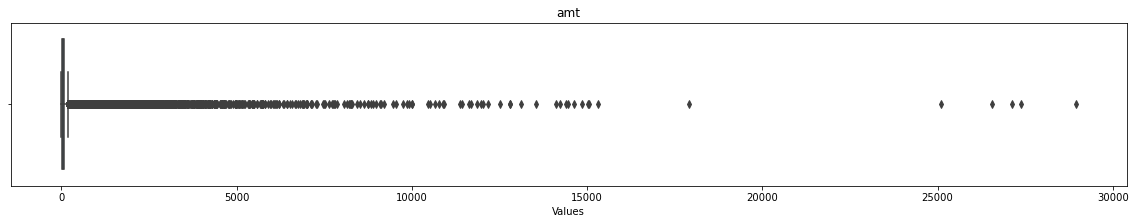

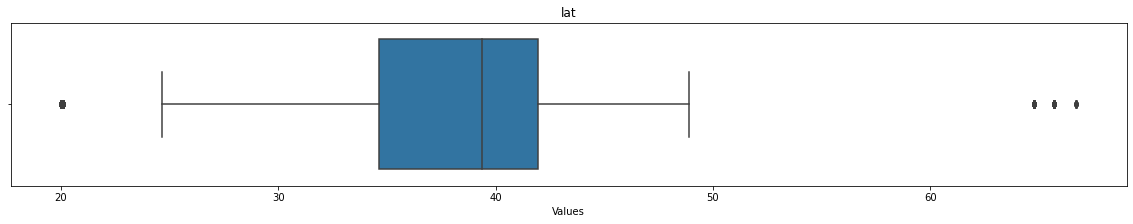

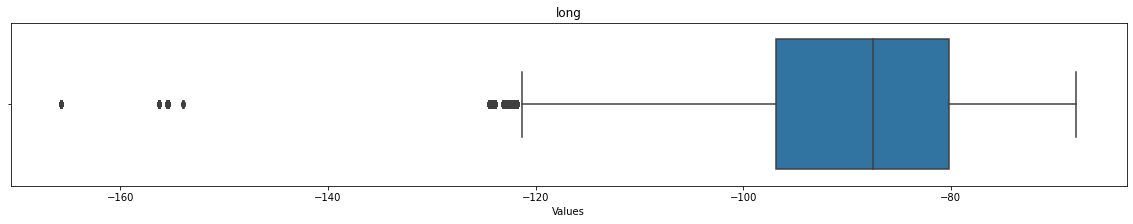

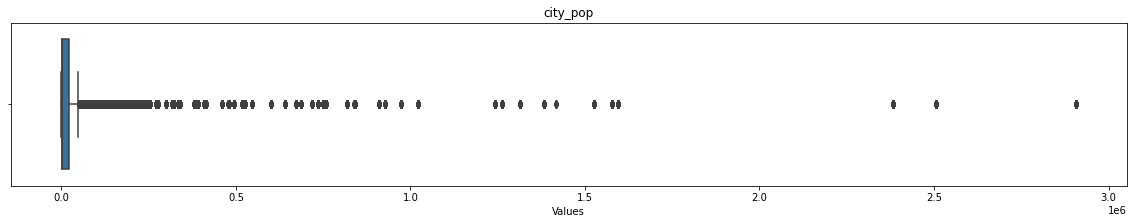

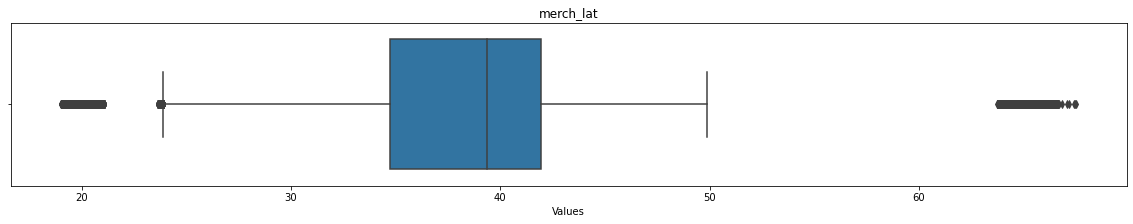

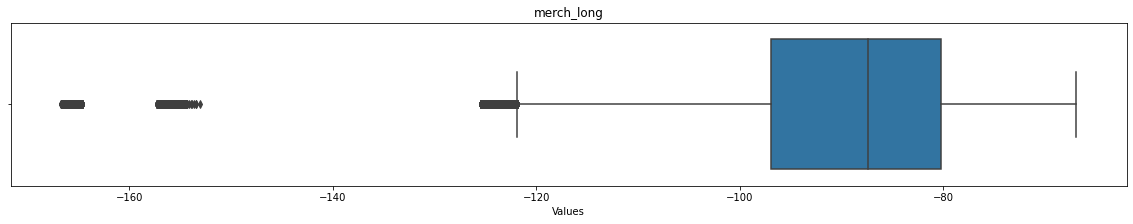

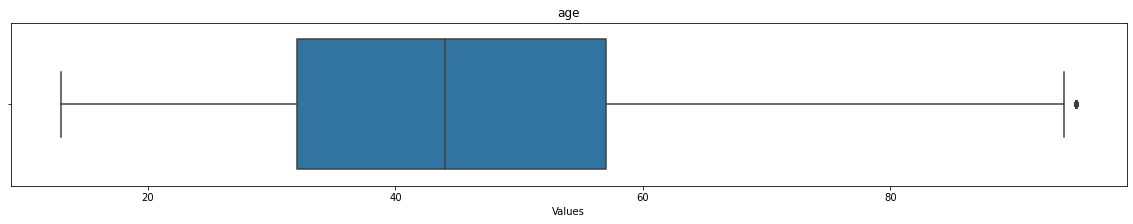

In [6]:
for column in df_con_num.columns:
    plt.figure(figsize=(20,3)) 
    sns.boxplot(data= df_con_num ,  x= df_con_num[column])
    plt.title(column)
    plt.xlabel('Values')
    plt.show()   

<AxesSubplot:xlabel='amt'>

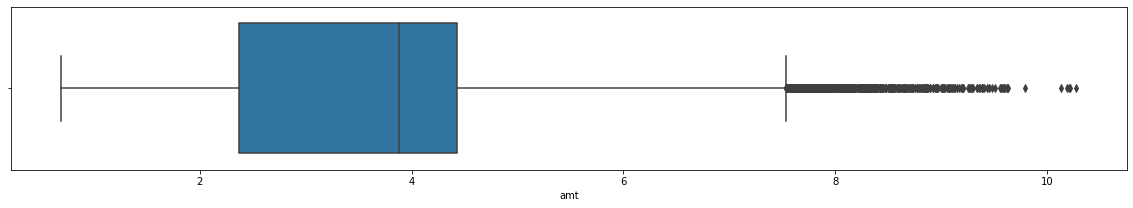

In [7]:
plt.figure(figsize=(20,3)) 

df['amt'].describe()
sns.boxplot(data= df_con_num ,  x= np.log1p( df_con_num['amt']) ) 


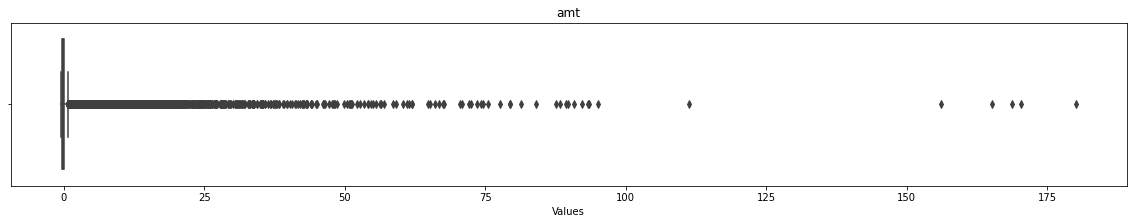

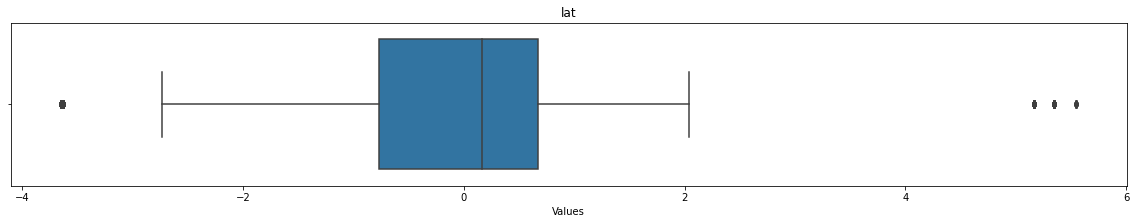

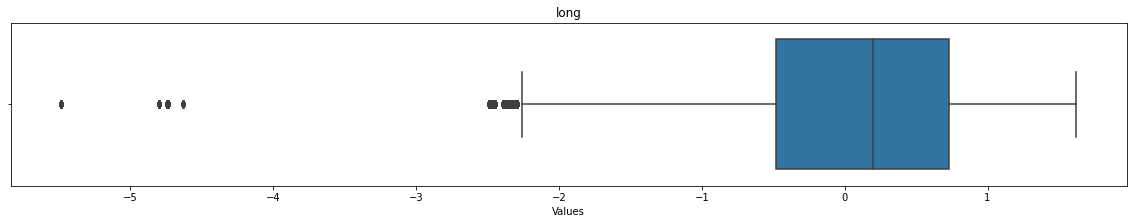

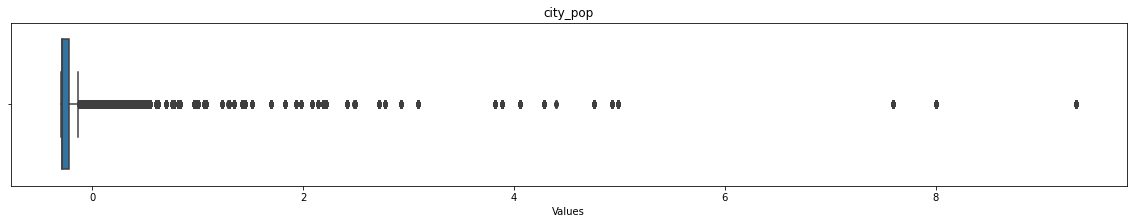

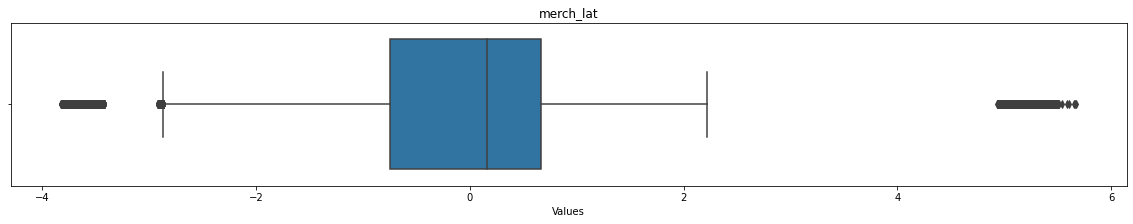

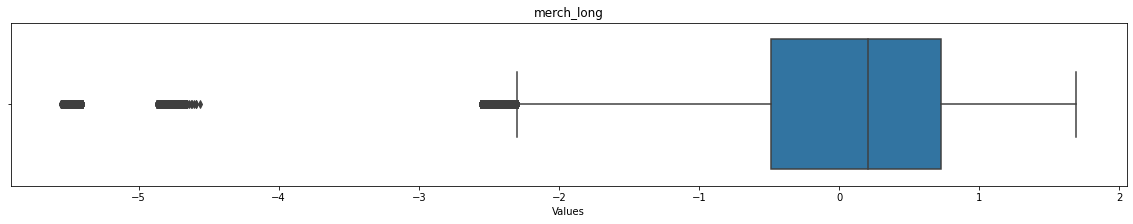

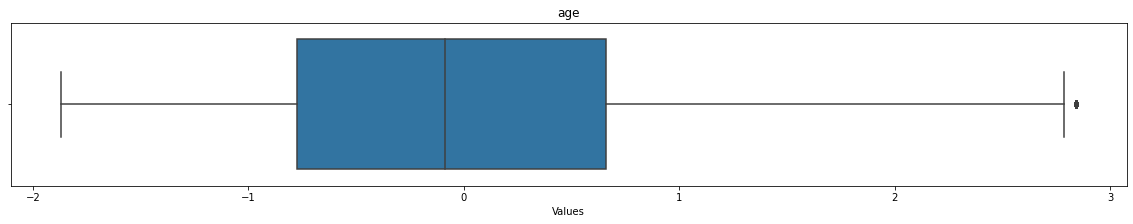

In [8]:
from sklearn.preprocessing  import  StandardScaler 
sc = StandardScaler() 

scaled_data = sc.fit_transform(df_con_num)
scaled_df = pd.DataFrame(scaled_data, columns=df_con_num.columns)
for column in scaled_df.columns:
    plt.figure(figsize=(20,3)) 
    sns.boxplot(data= scaled_df ,  x= scaled_df[column])
    plt.title(column)
    plt.xlabel('Values')
    plt.show()   


c:\Users\ahmed\anaconda3\lib\site-packages\pandas\core\frame.py:8922: RuntimeWarning: invalid value encountered in log1p
  return lib.map_infer(x.astype(object)._values, func, ignore_na=ignore_na)


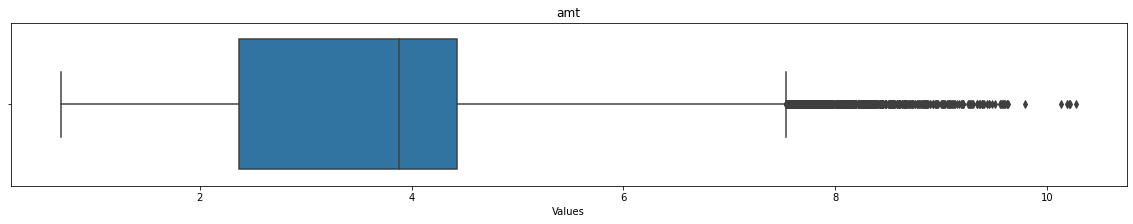

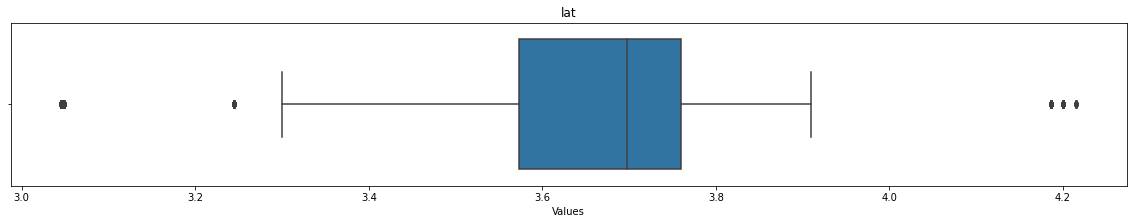

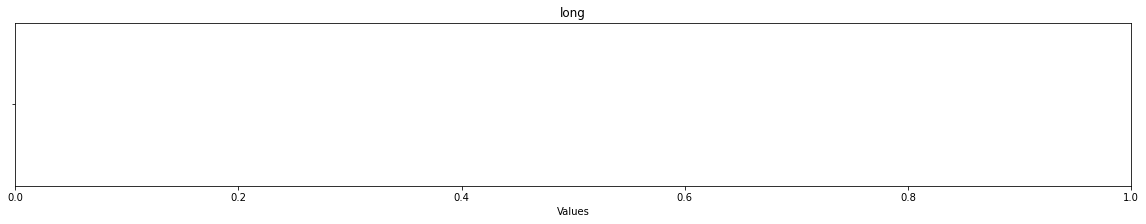

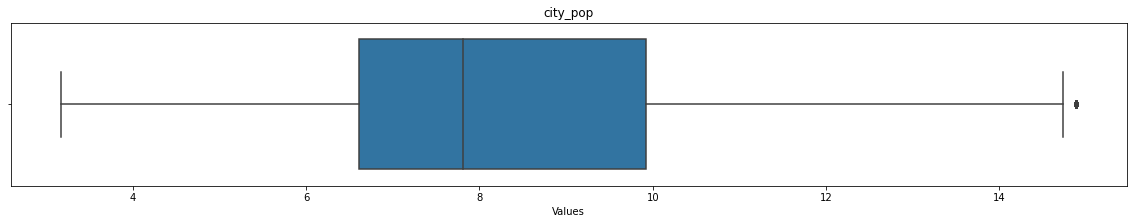

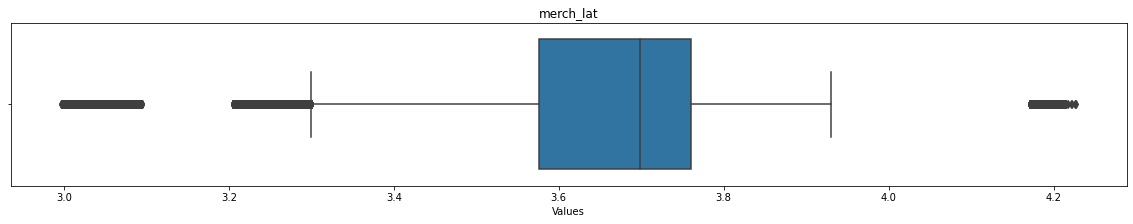

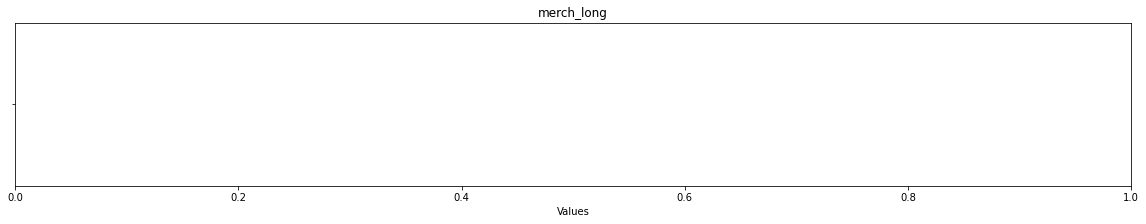

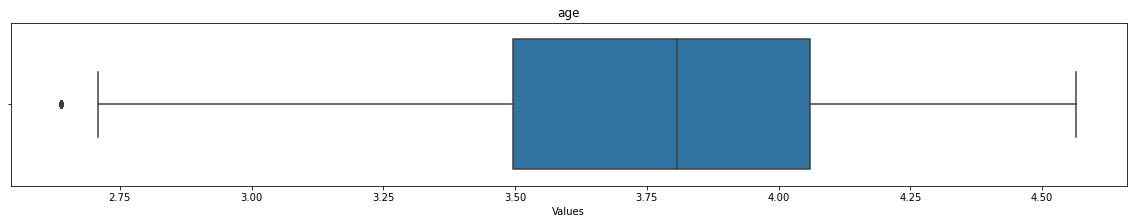

In [9]:
log1p_df = df_con_num.applymap(np.log1p)
for column in log1p_df.columns:
    plt.figure(figsize=(20,3)) 
    sns.boxplot(data= log1p_df ,  x= log1p_df[column])
    plt.title(column)
    plt.xlabel('Values')
    plt.show()    

Ok so standard scaler doesn't fix the distribution of some features but log scaling does , i guess we will have to try a baseline model first and see how this will work 

In [13]:
categ_features=[feature for feature in df.columns if df[feature].dtypes=='O'  ]
df_categ=df[categ_features]
df_categ   
df_categ.describe()

,cc_num,merchant,category,gender,street,city,state,zip,job
count,1296675,1296675,1296675,1296675,1296675,1296675,1296675,1296675,1296675
unique,983,693,14,2,983,894,51,970,494
top,571365235126,fraud_Kilback LLC,gas_transport,F,0069 Robin Brooks Apt. 695,Birmingham,TX,73754,Film/video editor
freq,3123,4403,131659,709863,3123,5617,94876,3646,9779


too many values to visualize , and too many values to one hot encode 

### Baseline Model

In [39]:
from sklearn.preprocessing import LabelEncoder


df_test = pd.read_csv('../../data/fraudTest.csv')
df_train = pd.read_csv('../../data/fraudTrain.csv')



def preprocess(df_x): 
    df_x.drop(columns=['Unnamed: 0'] , inplace=True)
    df_x.drop(columns=['trans_num' ,'unix_time' ,'first' ,'last' ] , inplace=True)  
    df_x['trans_date_trans_time'] = pd.to_datetime(df_x['trans_date_trans_time'])
    df_x['dob'] = pd.to_datetime(df_x['dob']) 
    df_x['age'] = (df_x['trans_date_trans_time'] - df_x['dob']).apply(lambda x: x.days // 365) 
    df_x.drop(columns=['dob'] , inplace=True)
    df_x['cc_num'] = df_x['cc_num'].astype('str') 
    df_x['zip'] = df_x['zip'].astype('str') 

    df_x['hour'] = df_x['trans_date_trans_time'].dt.hour
    df_x['day'] = df_x['trans_date_trans_time'].dt.day
    df_x['month'] = df_x['trans_date_trans_time'].dt.month
    df_x['year'] = df_x['trans_date_trans_time'].dt.year  

    df_x.drop(columns=['trans_date_trans_time'] , inplace = True)

    df_x.drop(columns=['year' ] , inplace = True)

    categ_features=[feature for feature in df_x.columns if df_x[feature].dtypes=='O'  ]

    label_encoder = LabelEncoder()

    # Loop through categorical features and apply Label Encoder
    for feature in categ_features:
        df_x[feature] = label_encoder.fit_transform(df_x[feature])


    return df_x

df_test = preprocess(df_test)
df_train = preprocess(df_train)




In [11]:
from sklearn.metrics import classification_report , roc_auc_score
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler


In [34]:
def feat_impo(model ) : 
 
    feature_importance = model.feature_importances_
    sorted_idx = np.argsort(feature_importance)  
    fig = plt.figure(figsize=(12, 6)) 
    plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center')
    plt.yticks(range(len(sorted_idx)), np.array(X_test.columns)[sorted_idx])
    plt.title('Feature Importance')  


def resample(df_x) :
    X = df_x.drop(columns=['is_fraud'])
    oversampler = RandomOverSampler(sampling_strategy='minority')
    X_resampled, y_resampled = oversampler.fit_resample(X, df_x.is_fraud) 
    return X_resampled, y_resampled 


In [40]:
x_train , y_train  = resample(df_train)
#x_test , y_test = resample(df_test)  

In [41]:
x_test = df_test.drop(columns=['is_fraud'])
y_test = df_test['is_fraud']   

In [50]:
import xgboost as xgb 
model_xgb = xgb.XGBClassifier( 
            n_estimators=300,  
            max_depth=8, 
            learning_rate=0.07, 
            subsample=0.8,
            colsample_bytree=0.4,  
            missing=-1, 
            eval_metric='auc',   
            tree_method='gpu_hist',
            random_state = 0 
        )   

model_xgb.fit(x_train , y_train) 


XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.4,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric='auc', feature_types=None, gamma=0, gpu_id=0,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.07, max_bin=256,
              max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
              max_depth=8, max_leaves=0, min_child_weight=1, missing=-1,
              monotone_constraints='()', n_estimators=300, n_jobs=0,
              num_parallel_tree=1, predictor='auto', random_state=0, ...)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    553574
           1       0.51      0.85      0.64      2145

    accuracy                           1.00    555719
   macro avg       0.75      0.92      0.82    555719
weighted avg       1.00      1.00      1.00    555719



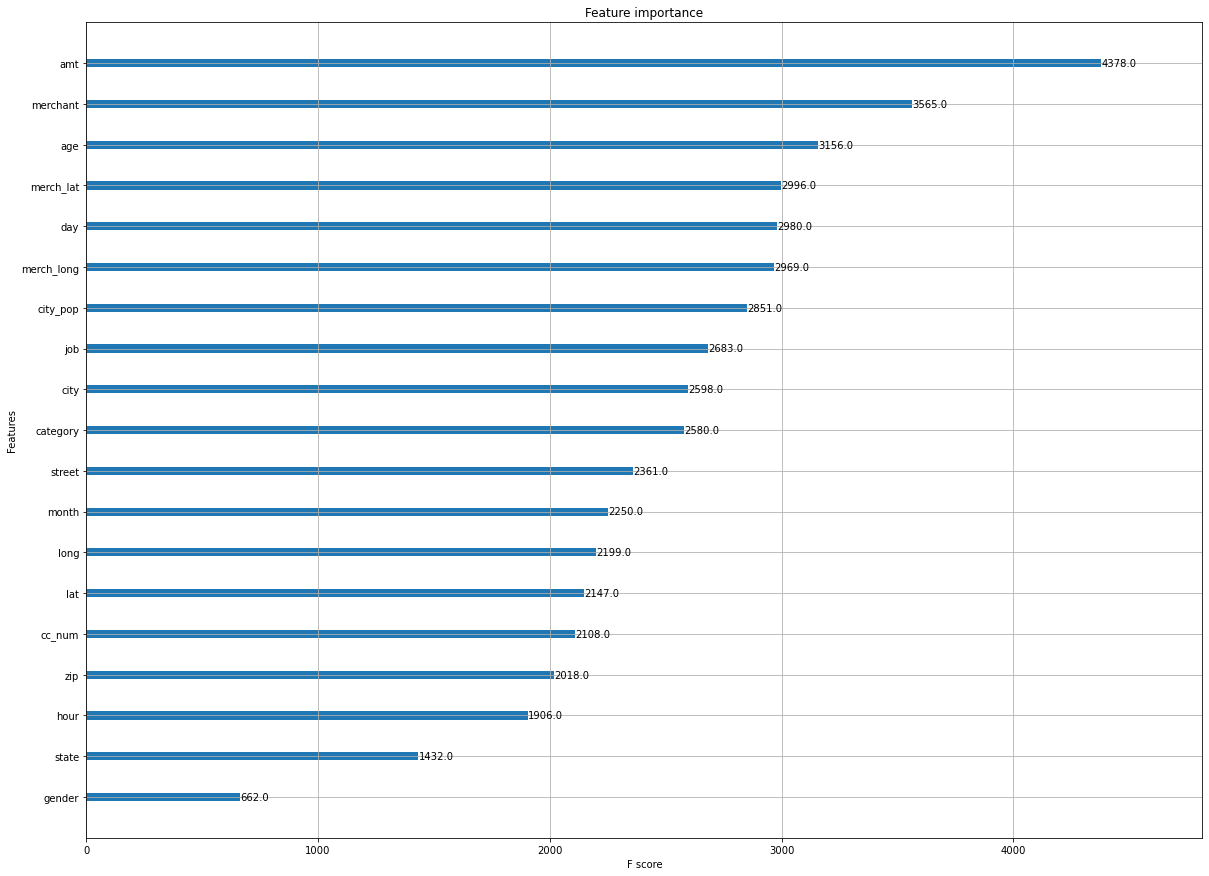

In [51]:
preds = model_xgb.predict(x_test) 

print(classification_report(y_test, preds))

from xgboost import plot_importance

plt.rcParams["figure.figsize"] = (20, 15)
plot_importance(model_xgb,max_num_features=100) 
plt.show() 

In [53]:
from catboost import CatBoostClassifier

cat_params = {
                'n_estimators':5000,
                'learning_rate': 0.07,
                "eval_metric" : 'F1', 
                # #'TotalF1',  
                #'eval_metric':'AUC',   
                'loss_function':'Logloss', 
                'metric_period':500,  
                'od_wait':500,  
                'task_type':'GPU',      
                'depth': 8,            
                }        
model_cat = CatBoostClassifier(**cat_params)     
model_cat.fit(x_train,y_train)    


0:	learn: 0.9384385	total: 53.2ms	remaining: 4m 25s
500:	learn: 0.9983107	total: 22.4s	remaining: 3m 21s
1000:	learn: 0.9995484	total: 44.9s	remaining: 2m 59s
1500:	learn: 0.9998697	total: 1m 7s	remaining: 2m 37s
2000:	learn: 0.9999616	total: 1m 29s	remaining: 2m 14s
2500:	learn: 0.9999903	total: 1m 51s	remaining: 1m 51s
3000:	learn: 0.9999996	total: 2m 14s	remaining: 1m 29s
3500:	learn: 0.9999996	total: 2m 36s	remaining: 1m 7s
4000:	learn: 1.0000000	total: 2m 58s	remaining: 44.6s
4500:	learn: 1.0000000	total: 3m 20s	remaining: 22.2s
4999:	learn: 1.0000000	total: 3m 42s	remaining: 0us


              precision    recall  f1-score   support

           0       1.00      1.00      1.00    553574
           1       0.89      0.77      0.83      2145

    accuracy                           1.00    555719
   macro avg       0.94      0.89      0.91    555719
weighted avg       1.00      1.00      1.00    555719

0.8872192979878674


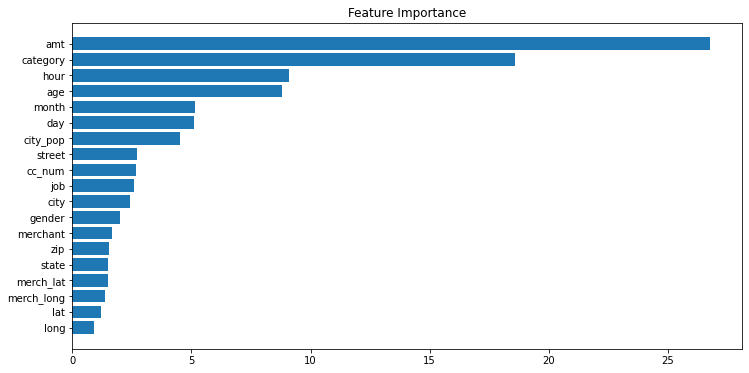

In [54]:
preds = model_cat.predict(x_test)
print(classification_report(y_test, preds))   
feat_impo(model_cat) 
print(roc_auc_score(y_test, preds))